In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
path = os.getcwd() + '/fullGamesWithResultsAndRecentGame.csv'
data = pd.read_csv(path)
data.head()

,HomeTeam,AwayTeam,HomeGoals,AwayGoals,HomeXG,AwayXG,HomeShots,AwayShots,HomeCorners,AwayCorners,HomeSubs,AwaySubs,HomeYC,AwayYC,HomeRC,AwayRC,HomeResult,AwayResult,HomeLastGame,AwayLastGame
0,Borussia Dortmund,Hamburg SV,3.0,1.0,1.8354,0.4050,13.0,4.0,7.0,7.0,3.0,3.0,1.0,3.0,0.0,0.0,2,0,0,0
1,FC Augsburg,SC Freiburg,2.0,2.0,1.6848,0.5423,10.0,6.0,5.0,4.0,3.0,2.0,2.0,4.0,0.0,0.0,1,1,0,0
2,Werder Bremen,Kaiserslautern,2.0,0.0,2.5788,1.0306,10.0,6.0,6.0,5.0,2.0,3.0,1.0,2.0,0.0,0.0,2,0,0,0
3,Paris Saint-Germain,Lorient,0.0,1.0,0.5509,0.8049,9.0,7.0,7.0,6.0,3.0,3.0,1.0,3.0,0.0,0.0,0,2,0,0
4,Caen,Valenciennes,1.0,0.0,0.7052,1.5982,9.0,9.0,3.0,11.0,2.0,2.0,2.0,1.0,0.0,0.0,2,0,0,0


In [3]:
# Imports for Decision Tree and Random Forest
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Going to break into two datasets, one for home goal stuff, and one for away goal stuff

home = data[[ 'HomeTeam','HomeXG', 'HomeShots', 'HomeCorners', 'HomeSubs', 'HomeYC', 'HomeRC', 'HomeLastGame', 'HomeGoals']]
away = data[[ 'AwayTeam','AwayXG', 'AwayShots', 'AwayCorners', 'AwaySubs', 'AwayYC', 'AwayRC', 'AwayLastGame', 'AwayGoals']]

In [5]:
# Split into training and testing sets

trainHome, valHome = train_test_split(home, test_size=0.80, random_state=0)
trainAway, valAway = train_test_split(away, test_size=0.80, random_state=0)

In [6]:
# Break training into X and Y
cols = home.shape[1]
trainHomeX = trainHome.iloc[:,1:cols-1] # iloc slicing function 
trainHomeY = trainHome.iloc[:,cols-1:cols]

trainAwayX = trainAway.iloc[:,1:cols-1] # iloc slicing function 
trainAwayY = trainAway.iloc[:,cols-1:cols]

In [7]:
# Break validation into X and Y
cols = home.shape[1]
valHomeX = valHome.iloc[:,1:cols-1] # iloc slicing function 
valHomeY = valHome.iloc[:,cols-1:cols]

valAwayX = valAway.iloc[:,1:cols-1] # iloc slicing function 
valAwayY = valAway.iloc[:,cols-1:cols]

Going to start by building a decision tree, seeing how that scores, and then building a forest.

In [8]:
# Home Decision Tree
homeDtc = DecisionTreeClassifier(random_state=0).fit(trainHomeX, trainHomeY)
print(homeDtc.score(valHomeX, valHomeY))

0.2915977961432507


In [9]:
# Home Decision Tree
awayDtc = DecisionTreeClassifier(random_state=0).fit(trainAwayX, trainAwayY)
print(awayDtc.score(valAwayX, valAwayY))

0.3276859504132231


So the scores are meh, going to try creating random forests for both the home team and the away team.

In [45]:
homeForest = RandomForestClassifier(n_estimators=100).fit(trainHomeX, np.ravel(trainHomeY))
print(homeForest.score(valHomeX, valHomeY))

0.3216253443526171


In [46]:
awayForest = RandomForestClassifier(n_estimators=100).fit(trainAwayX, np.ravel(trainAwayY))
print(awayForest.score(valAwayX, valAwayY))

0.38154269972451793


Had slightly better results from the random forests than with the decision trees.

Now going to try and predict the goal values and see how I did in predicting the results of games

In [47]:
predHome = homeForest.predict(valHomeX)
predAway = awayForest.predict(valAwayX)

# This outputs an array so want to convert it to a df

In [48]:
predHomedf = dfTeams = pd.DataFrame(predHome, columns = ['PredHomeGoals'])
predAwaydf = dfTeams = pd.DataFrame(predAway, columns = ['PredAwayGoals'])

In [49]:
# Reset all of the indexes
valHomeX = valHomeX.reset_index(drop = True)
valHomeY = valHomeY.reset_index(drop = True)

valAwayX = valAwayX.reset_index(drop = True) 
valAwayY = valAwayY.reset_index(drop = True)

In [50]:
dfFullHome = pd.concat([valHomeX, valHomeY, predHomedf], axis = 1, join = 'inner')
dfFullAway = pd.concat([valAwayX, valAwayY, predAwaydf], axis = 1, join = 'inner')

dfBoth = pd.concat([dfFullHome, dfFullAway], axis = 1, join = 'inner')

In [42]:
dfBoth

,HomeXG,HomeShots,HomeCorners,HomeSubs,HomeYC,HomeRC,HomeLastGame,HomeGoals,PredHomeGoals,AwayXG,AwayShots,AwayCorners,AwaySubs,AwayYC,AwayRC,AwayLastGame,AwayGoals,PredAwayGoals
0,1.2436,14.0,3.0,3.0,3.0,0.0,0,5.0,1.0,0.8794,9.0,6.0,2.0,4.0,0.0,0,3.0,1.0
1,0.7189,10.0,1.0,3.0,1.0,0.0,2,2.0,2.0,0.8211,7.0,4.0,3.0,1.0,0.0,0,0.0,0.0
2,1.0934,15.0,7.0,3.0,4.0,0.0,0,0.0,1.0,0.8675,7.0,3.0,3.0,3.0,0.0,2,0.0,1.0
3,1.0215,12.0,2.0,3.0,5.0,0.0,2,2.0,1.0,1.2658,12.0,8.0,3.0,3.0,0.0,0,0.0,2.0
4,1.4222,16.0,3.0,3.0,3.0,0.0,2,0.0,1.0,0.5097,4.0,1.0,3.0,3.0,0.0,2,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7255,0.3163,3.0,7.0,3.0,2.0,0.0,2,1.0,0.0,0.7604,8.0,1.0,2.0,2.0,0.0,1,0.0,1.0
7256,1.4963,9.0,8.0,1.0,1.0,0.0,0,1.0,3.0,0.6661,8.0,1.0,3.0,2.0,0.0,0,1.0,2.0
7257,2.3369,13.0,9.0,3.0,0.0,0.0,2,5.0,4.0,0.4350,4.0,9.0,3.0,2.0,0.0,2,0.0,0.0
7258,1.3036,14.0,4.0,3.0,2.0,1.0,0,0.0,1.0,2.0994,11.0,5.0,3.0,1.0,0.0,1,1.0,2.0


Now going to see how well the model performed

In [51]:
corHomeGoals = 0
corAwayGoals = 0
corResults = 0
equalRaw = 0
totalDraws = 0

for i in range(dfBoth.shape[0]):
    # Check if goals were predicted correctly
    if(dfBoth['HomeGoals'][i] == dfBoth['PredHomeGoals'][i]):
        corHomeGoals += 1
    if(dfBoth['AwayGoals'][i] == dfBoth['PredAwayGoals'][i]):
        corAwayGoals += 1
        
    # Check results with predicted goal values 
    if((dfBoth['HomeGoals'][i] == dfBoth['AwayGoals'][i]) & (dfBoth['PredHomeGoals'][i] == dfBoth['PredAwayGoals'][i])):
        corResults += 1
    if((dfBoth['HomeGoals'][i] < dfBoth['AwayGoals'][i]) & (dfBoth['PredHomeGoals'][i] < dfBoth['PredAwayGoals'][i])):
        corResults += 1
    if((dfBoth['HomeGoals'][i] > dfBoth['AwayGoals'][i]) & (dfBoth['PredHomeGoals'][i] > dfBoth['PredAwayGoals'][i])):
        corResults += 1
    
    # Get total Draws
    if(dfBoth['HomeGoals'][i] == dfBoth['AwayGoals'][i]):
        totalDraws += 1

In [52]:
print(corHomeGoals)
print(corAwayGoals)
print(corResults)

2335
2770
3496


In [35]:
print("Results: ")
print("Home Goal Proportion: " , corHomeGoals / dfBoth.shape[0])
print("Away Goal Proportion: " , corAwayGoals / dfBoth.shape[0])
print("Overall Goal Proportion: " , (corHomeGoals + corAwayGoals) / (2 * dfBoth.shape[0]))
print("Correct Result Proportion: " , corResults / dfBoth.shape[0])

Results: 
Home Goal Proportion:  0.328099173553719
Away Goal Proportion:  0.38732782369146007
Overall Goal Proportion:  0.35771349862258955
Correct Result Proportion:  0.4829201101928375


Going to try and make a visualization

In [20]:
actualWins = 0
actualDraws = 0
actualLosses = 0

predWins = 0
predDraws = 0
predLosses = 0


for i in range(dfBoth.shape[0]):
    # Get totals for actual results
    if(dfBoth['HomeGoals'][i] < dfBoth['AwayGoals'][i]):
        actualLosses += 1
    if(dfBoth['HomeGoals'][i] == dfBoth['AwayGoals'][i]):
        actualDraws += 1
    if(dfBoth['HomeGoals'][i] > dfBoth['AwayGoals'][i]):
        actualWins += 1
    
    # Get totals for predicted results
    if(dfBoth['PredHomeGoals'][i] < dfBoth['PredAwayGoals'][i]):
        predLosses += 1
    if(dfBoth['PredHomeGoals'][i] == dfBoth['PredAwayGoals'][i]):
        predDraws += 1
    if(dfBoth['PredHomeGoals'][i] > dfBoth['PredAwayGoals'][i]):
        predWins += 1


In [21]:
import matplotlib.pyplot as plt

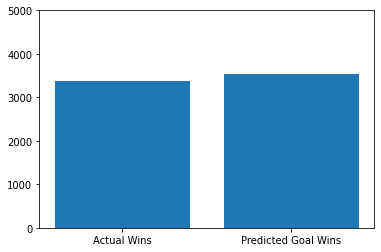

In [22]:
x = np.array(['Actual Wins', 'Predicted Goal Wins'])
y = np.array([actualWins, predWins])

plt.bar(x, y)
plt.ylim([0,5000])
plt.show()

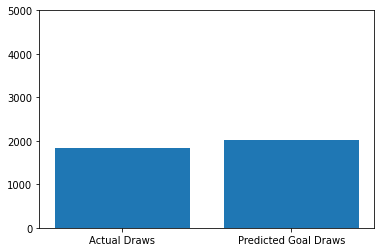

In [23]:
x = np.array(['Actual Draws', 'Predicted Goal Draws'])
y = np.array([actualDraws, predDraws])

plt.bar(x, y)
plt.ylim([0,5000])
plt.show()

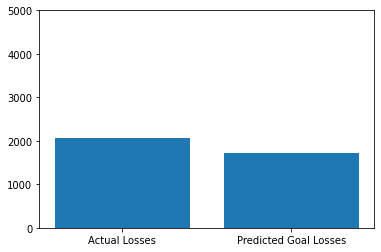

In [24]:
x = np.array(['Actual Losses', 'Predicted Goal Losses'])
y = np.array([actualLosses, predLosses])

plt.bar(x, y)
plt.ylim([0,5000])
plt.show()